<a href="https://colab.research.google.com/github/vitorsr/ccd/blob/master/maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get update -qqq

# Bibliotecas necessárias para instalação do cartopy e geoplot
#   Ver: https://github.com/googlecolab/colabtools/issues/85#issuecomment-372532728
!apt-get install -y -qqq libproj-dev proj-data proj-bin
!apt-get install -y -qqq libgeos-dev

!pip install -q -U cartopy
!pip install -q -U geopandas
!pip install -q -U geoplot

In [0]:
import pandas as pd
import mapclassify
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt

In [0]:
stations_df = pd.read_csv("https://onedrive.live.com/download?cid=BCBADB0836C97273&resid=BCBADB0836C97273%21115089&authkey=AN3WuZnSKh9jgC8")
inmetr_df = pd.read_csv("https://raw.githubusercontent.com/vitorsr/ccd/master/data/baseline_temp2.csv?token=AFPQLZBILR7UOZB72SARAY25XY5US")

# inmetr_df = pd.read_csv("https://onedrive.live.com/download?cid=BCBADB0836C97273&resid=BCBADB0836C97273%21115090&authkey=AHJ7x3UN1MzJW1M")

In [56]:
inmetr_df

,date,id,tair,tmax,tmin,tw
0,08-01,82024,-3.135246,2.330769,-1.400000,-1.482883
1,08-01,82098,1.862640,1.224000,2.968000,0.983221
2,08-01,82106,-0.256329,0.103704,0.892453,1.455479
3,08-01,82141,1.204618,0.666038,3.034615,0.761078
4,08-01,82145,0.789368,1.067500,1.788372,0.633046
...,...,...,...,...,...,...
5404,08-31,83964,-1.123410,-0.470455,-0.202326,0.705897
5405,08-31,83967,-0.686076,-3.014815,1.864151,0.562252
5406,08-31,83980,-1.700680,-3.338298,0.040426,-0.286758
5407,08-31,83985,0.298754,-1.144118,2.300000,0.881308


In [57]:
df

,id,lon,lat,alt,name,state,uf,time_zone,offset_utc,time_zone.1,offset_utc.1,date,tair,tmax,tmin,tw
0,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,08-01,1.241905,3.297674,0.611111,0.155556
1,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,08-02,1.075887,3.111628,1.380000,NaN
2,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,08-03,-3.331915,-6.439024,-2.695455,NaN
3,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,08-04,-6.830952,-5.102381,-6.804545,NaN
4,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,08-05,-6.502128,-2.728571,-8.546667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,08-27,-1.316667,-1.418519,-0.080000,NaN
5405,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,08-28,-1.004487,-0.959259,-0.428000,NaN
5406,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,08-29,-0.206410,0.088889,-0.314000,NaN
5407,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,08-30,0.187179,0.468519,1.114000,NaN


In [0]:
df = pd.merge(stations_df, inmetr_df, on='id')

In [0]:
!wget -q "https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_BRA_shp.zip"
!unzip -qq -u gadm36_BRA_shp.zip

In [0]:
br = gpd.read_file('gadm36_BRA_1.shp') # 0=país, 1=estado, 2=cidade

In [0]:
df_sorted = df.sort_values(by=['date'])
df_08 = df_sorted[(df_sorted['date'] >= '08-01') & (df_sorted['date'] <= '08-31')]

Cria lista de dataframes diários

In [0]:
lst_08 = [v for k, v in df_08.groupby('date')]

In [68]:
type(lst_08[0])

pandas.core.frame.DataFrame

In [0]:
# gdf = gpd.GeoDataFrame(
#     df, 
#     geometry=gpd.points_from_xy(df.lon, df.lat))

In [0]:
gdf_lst = []
for i,d in enumerate(lst_08):
  df = lst_08[i]
  gdf = gpd.GeoDataFrame(
      df, 
      geometry=gpd.points_from_xy(df.lon, df.lat))
  gdf['tair'] = gdf['tair'].round(2)
  gdf_lst.append(gdf)

## Plotagem dos gráficos.

In [0]:
# O plot desejado contém o parâmetro clip, mas, como a função demora a plotar 
# o gráfico quando esse parâmetro é enviado, usamos um plot sem ele apenas 
# para testes.

# ax = gplt.kdeplot(gdf_2018_08_01_00[gdf_2018_08_01_00['tair'] > 0], shade=True, cmap='Reds', n_levels=20, )
# gplt.polyplot(br, zorder=1, ax=ax)
# plt.title("Mapa de ???, 08/01/2018 00:00")

In [79]:
gdf

,id,lon,lat,alt,name,state,uf,time_zone,offset_utc,time_zone.1,offset_utc.1,date,tair,tmax,tmin,tw,geometry
1140,82686,-39.300000,-6.366667,217.67,Iguatu,Ceará,CE,America/Fortaleza,-3,America/Fortaleza,-3,08-31,1.12,NaN,0.975000,NaN,POINT (-39.30000 -6.36667)
92,82994,-35.700000,-9.666667,64.50,Maceió,Alagoas,AL,America/Maceio,-3,America/Maceio,-3,08-31,1.13,1.209524,2.268293,NaN,POINT (-35.70000 -9.66667)
2716,83565,-51.183333,-19.750000,331.25,Paranaíba,Mato Grosso do Sul,MS,America/Campo_Grande,-4,America/Campo_Grande,-4,08-31,4.18,5.081081,NaN,2.014159,POINT (-51.18333 -19.75000)
585,83179,-43.166667,-11.083333,401.58,Barra,Bahia,BA,America/Bahia,-3,America/Bahia,-3,08-31,-1.31,NaN,0.891176,NaN,POINT (-43.16667 -11.08333)
2685,83428,-46.550000,-16.366667,460.00,Unaí,Minas Gerais,MG,America/Sao_Paulo,-3,America/Sao_Paulo,-3,08-31,1.98,2.820588,-4.444444,0.658567,POINT (-46.55000 -16.36667)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,82410,-70.033333,-4.383333,65.00,Benjamin Constant,Amazonas,AM,America/Eirunepe,-5,America/Eirunepe,-5,08-31,1.37,3.242222,2.812500,NaN,POINT (-70.03333 -4.38333)
1385,83368,-52.233333,-15.900000,345.00,Aragarças,Goiás,GO,America/Sao_Paulo,-3,America/Sao_Paulo,-3,08-31,3.56,3.595455,-1.123913,NaN,POINT (-52.23333 -15.90000)
523,82098,-51.116667,-0.050000,14.46,Macapá,Amapá,AP,America/Belem,-3,America/Belem,-3,08-31,1.15,0.615686,1.727451,0.019608,POINT (-51.11667 -0.05000)
1540,83464,-51.716667,-17.883333,662.86,Jataí,Goiás,GO,America/Sao_Paulo,-3,America/Sao_Paulo,-3,08-31,1.76,2.818421,0.561538,NaN,POINT (-51.71667 -17.88333)


/usr/local/lib/python3.6/dist-packages/geoplot/geoplot.py:597: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/geoplot/geoplot.py:597: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=self.figsize)
/usr/local/lib/python3.6/dist-packages/geoplot/geoplot.py:597: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To 

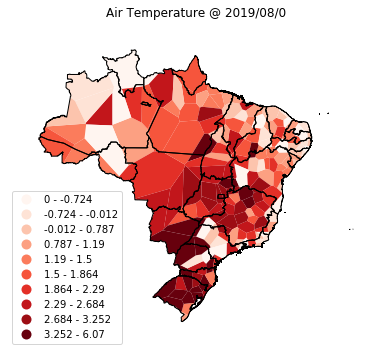

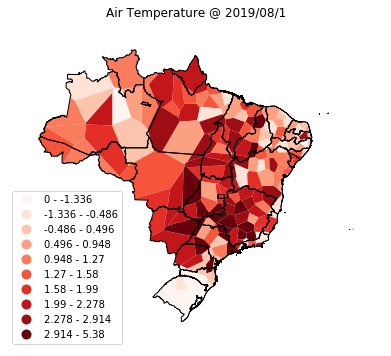

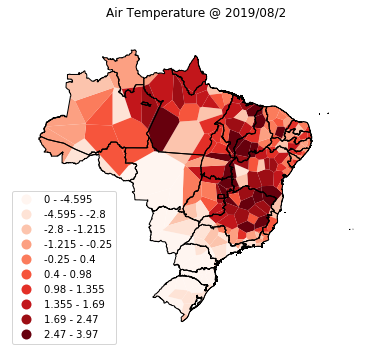

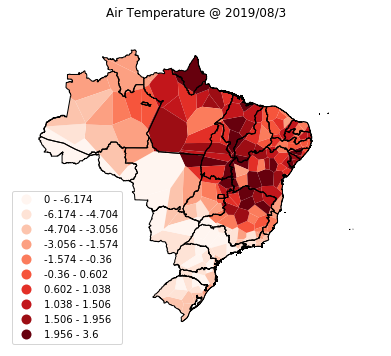

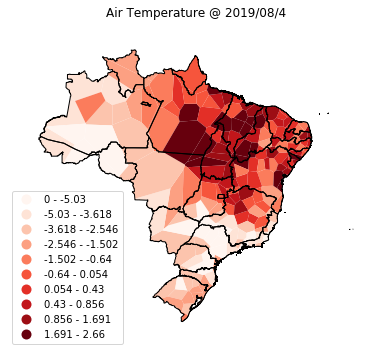

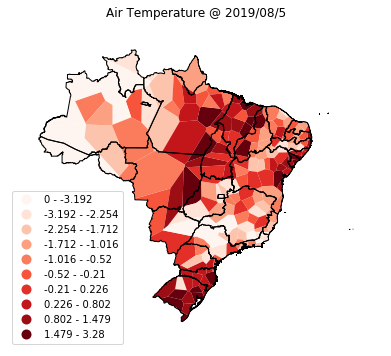

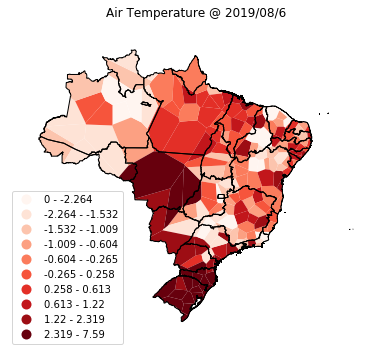

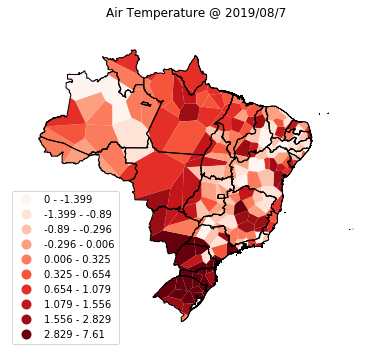

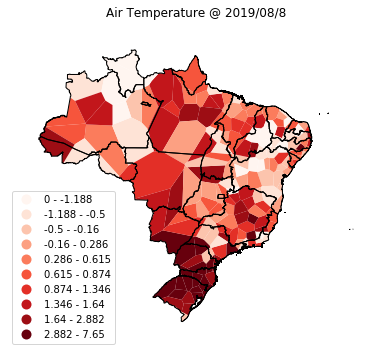

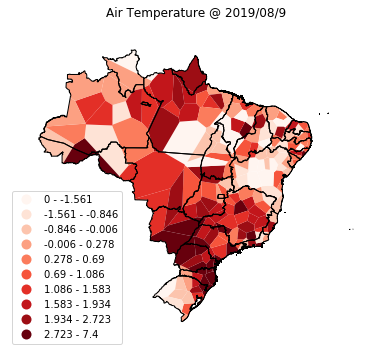

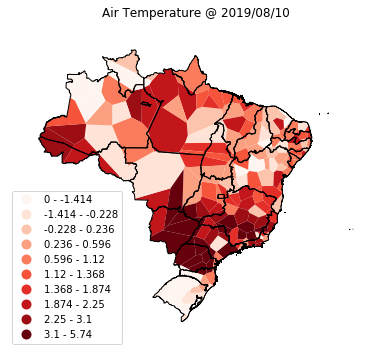

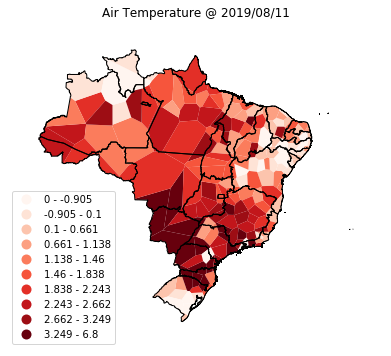

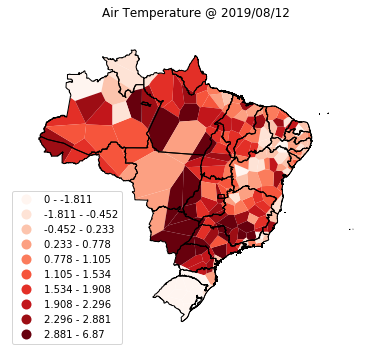

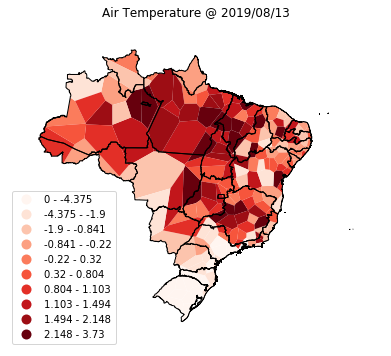

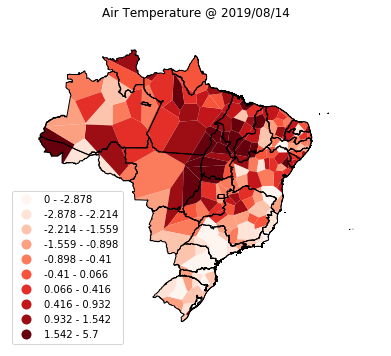

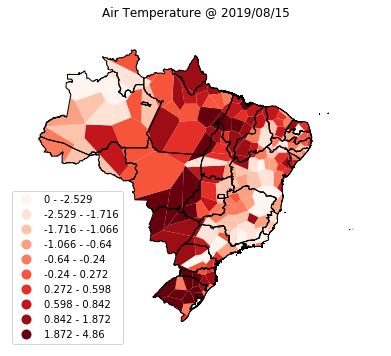

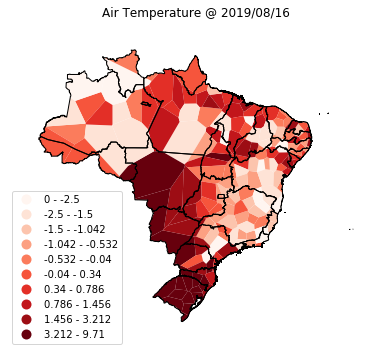

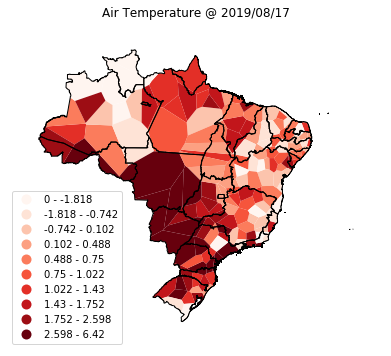

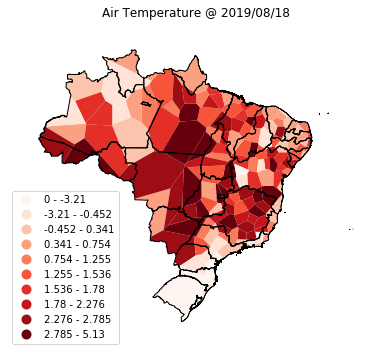

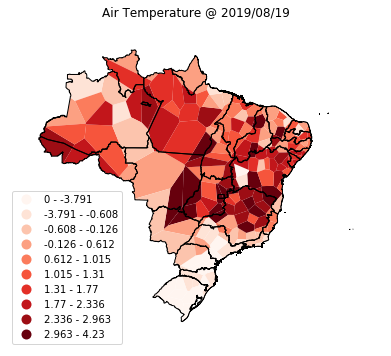

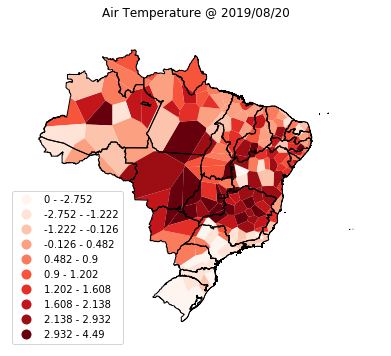

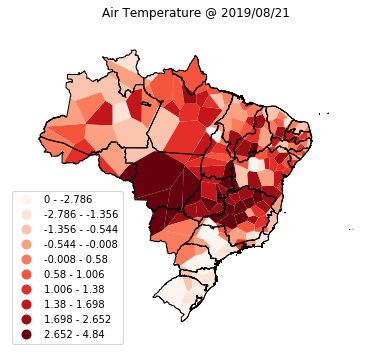

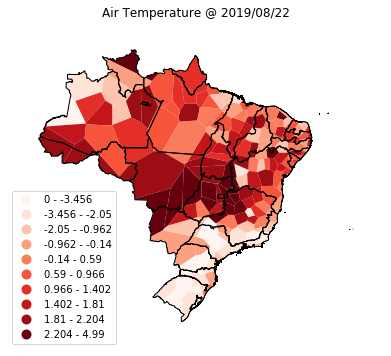

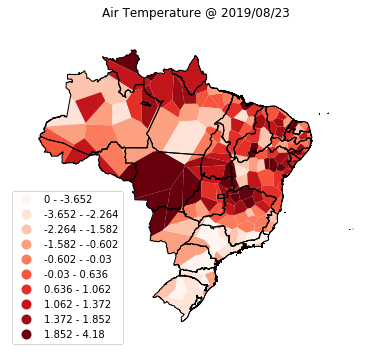

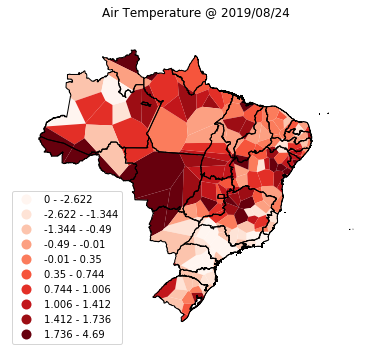

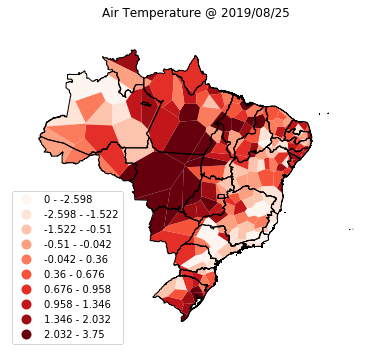

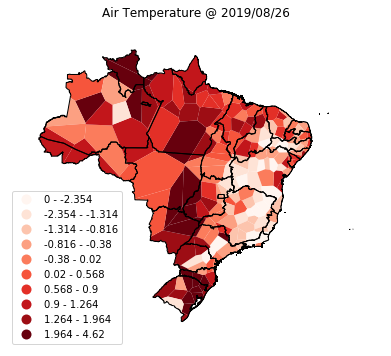

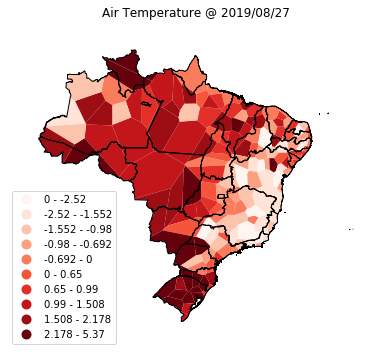

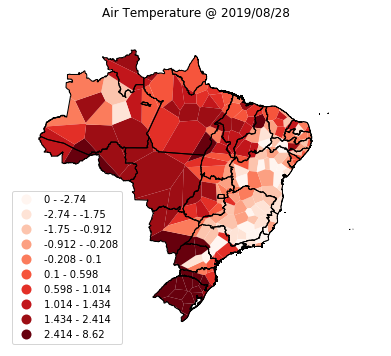

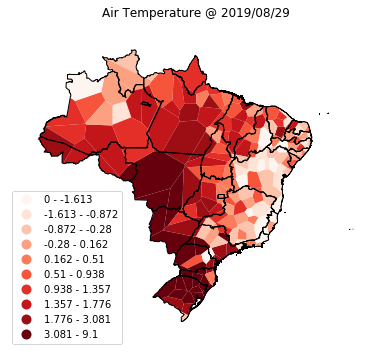

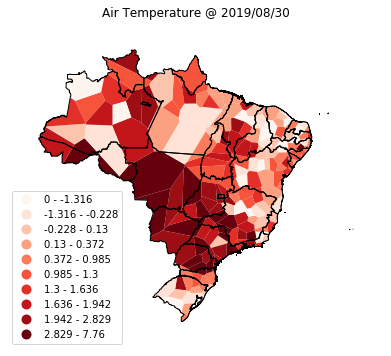

In [83]:
var = 'tair'
for i, gd in enumerate(gdf_lst):
  ax = gplt.voronoi(
      gd[gd[var] == gd[var]], # Nota: NaN == NaN sempre retorna False!
      clip=br.simplify(0.1),
      hue=var, k=10, cmap='Reds', edgecolor='None',
      legend=True
  )
  gplt.polyplot(br, edgecolor='black', zorder=1, ax=ax)
  ax.set_title("Air Temperature @ 2019/08/" + str(i))
  plt.savefig(str(i) + '.png')